In [1]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
#from sklearn.feature_extraction.text import CountVectorizer ## TEST
from sklearn.feature_extraction.text import TfidfVectorizer ## TEST
from sklearn.feature_extraction.text import TfidfTransformer
#from nltk.probability import FreqDist
from nltk.corpus import stopwords ## TEST
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB


In [2]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

In [3]:
#loading in cleaned data for analysis
X_lem = pd.read_pickle('modeling/X_lem.pkl')
y_lem = pd.read_pickle('modeling/y_lem.pkl')

#loading stop word list
sw_list = pd.read_pickle('modeling/stopwords.pkl')

In [4]:
X_lem[0]

'leader sector tackle toughest challenge grow startup improve early education quickly enter market serve organization size ranging smalltomidsized revenue le year top forbes list office practice eight functional practice private sector serve government weve completed project social sector organization last five mean whatever passion find others working similar topic mckinsey know want know want come mckinsey explore visit career website learn apply subscribe career blog weekly job alert story colleague twofold distinctive lasting substantial improvement performance build firm attracts develops excites retains exceptional element strongly connected helping solve toughest problem requires drawn matter together supportive dedicated colleague'

## Baseline Random Forest
- Random Forest with Lemmatization, trigrams
- **try also with BoW instead of TF-IDF??**
- **try also with Stemming instead of Lemmatization??** 

Results before additional preprocessing:
- Testing Accuracy: 0.5441
- Testing Precision: 0.5703
- Testing Recall: 0.6881
- F1 Score: 0.6237
- ngram_range=(1,3)

*Train-Test Split*

In [5]:
# always train-test split THEN apply vectorizer 
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(X_lem, y_lem, test_size=0.20, random_state=42)


In [6]:
null_accuracy = round(y_test_lem.value_counts()[0]/y_test_lem.value_counts().sum(), 4)
print('NOTE: Null Accuracy is', null_accuracy)

NOTE: Null Accuracy is 0.4509


*Vectorize*

In [7]:
#Vectorize Test Set
tfidf = TfidfVectorizer(stop_words=sw_list, ngram_range=(1,3)) ## TEST bigram/trigram

#fit vectorizer to both training and testing set
tfidf_data_train_lem = tfidf.fit_transform(X_train_lem)
tfidf_data_test_lem = tfidf.transform(X_test_lem)

*Model*

In [8]:
rf_classifier_lem = RandomForestClassifier(n_estimators=120, random_state=42)

In [39]:
## Fit model to train set
rf_classifier_lem.fit(tfidf_data_train_lem, y_train_lem)
rf_test_preds_lem = rf_classifier_lem.predict(tfidf_data_test_lem)
rf_train_preds_lem = rf_classifier_lem.predict(tfidf_data_train_lem)

*Evaluate Metrics*

In [40]:
#(ngram=1,3)
rf_acc_score_lem = accuracy_score(y_test_lem, rf_test_preds_lem)
rf_precision_score_lem = metrics.precision_score(y_test_lem, rf_test_preds_lem)
rf_recall_score_lem = metrics.recall_score(y_test_lem, rf_test_preds_lem)
rf_f1_score_lem = f1_score(y_test_lem, rf_test_preds_lem)

print('Random Forest with Lemmatization Features:\n')
print("Testing Accuracy: {:.4}".format(rf_acc_score_lem))
print("Testing Precision: {:.4}".format(rf_precision_score_lem))
print("Testing Recall: {:.4}".format(rf_recall_score_lem))
print("F1 Score: {:.4}".format(rf_f1_score_lem))

rf_train_accuracy = accuracy_score(y_train_lem, rf_train_preds_lem)
print("Training Accuracy: {:.4}".format(rf_train_accuracy))

Random Forest with Lemmatization Features:

Testing Accuracy: 0.5592
Testing Precision: 0.5558
Testing Recall: 0.9817
F1 Score: 0.7098
Training Accuracy: 1.0


(2.0, 0.0)

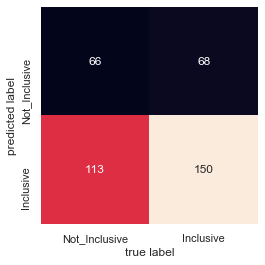

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()


mat = confusion_matrix(y_test_lem, rf_test_preds_lem)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Not_Inclusive', 'Inclusive'], 
            yticklabels=['Not_Inclusive', 'Inclusive']
           )
plt.xlabel('true label')
plt.ylabel('predicted label');

## Fixing cut-off bug
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

## Baseline Logistic Regression

- Testing Accuracy: 0.5768
- Testing Precision: 0.5702
- Testing Recall: 0.9312
- F1 Score: 0.7073

- ngram_range=(1,3)


In [12]:
# Train-test split
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(X_lem, y_lem, test_size=0.20, random_state=42)


**Vectorize**

In [13]:
# Vectorize Test Set
tfidf = TfidfVectorizer(stop_words=sw_list, ngram_range=(1,3))

#fit vectorizer to both training and testing set
tfidf_data_train_lem = tfidf.fit_transform(X_train_lem)
tfidf_data_test_lem = tfidf.transform(X_test_lem)

**Model**

In [14]:
from sklearn.linear_model import LogisticRegression

log_reg_baseline = LogisticRegression(random_state=42)

In [15]:
#fit model to train set
log_reg_baseline.fit(tfidf_data_train_lem, y_train_lem)

#predictions
log_reg_test_preds = log_reg_baseline.predict(tfidf_data_test_lem)

**Resulting Metrics**

In [16]:
log_reg_accuracy = accuracy_score(y_test_lem, log_reg_test_preds)
log_reg_precision = metrics.precision_score(y_test_lem, log_reg_test_preds)
log_reg_recall = metrics.recall_score(y_test_lem, log_reg_test_preds)
log_reg_f1 = f1_score(y_test_lem, log_reg_test_preds)

# printing scores
print('Logistic Regression with Lemmatization Features:\n')
print("Testing Accuracy: {:.4}".format(log_reg_accuracy))
print("Testing Precision: {:.4}".format(log_reg_precision))
print("Testing Recall: {:.4}".format(log_reg_recall))
print("F1 Score: {:.4}".format(log_reg_f1))


Logistic Regression with Lemmatization Features:

Testing Accuracy: 0.5768
Testing Precision: 0.5702
Testing Recall: 0.9312
F1 Score: 0.7073


(2.0, 0.0)

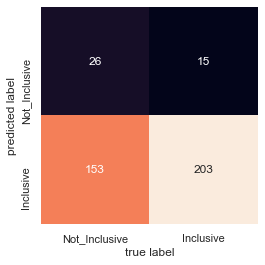

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()


mat = confusion_matrix(y_test_lem, log_reg_test_preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Not_Inclusive', 'Inclusive'], 
            yticklabels=['Not_Inclusive', 'Inclusive']
           )
plt.xlabel('true label')
plt.ylabel('predicted label');

## Fixing cut-off bug
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

## Naive Bayes

In [23]:
# Train-test split
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(X_lem, y_lem, test_size=0.20, random_state=42)


**Vectorize**

In [27]:
# Vectorize Test Set
tfidf = TfidfVectorizer(stop_words=sw_list, ngram_range=(2,3))

#fit vectorizer to both training and testing set
tfidf_data_train_lem = tfidf.fit_transform(X_train_lem)
tfidf_data_test_lem = tfidf.transform(X_test_lem)

**Model**

In [28]:
nb_classifier = MultinomialNB()

In [29]:
nb_classifier.fit(tfidf_data_train_lem, y_train_lem)
nb_train_preds = nb_classifier.predict(tfidf_data_train_lem)
nb_test_preds = nb_classifier.predict(tfidf_data_test_lem)

**Resulting Metrics**

In [36]:
nb_accuracy = accuracy_score(y_test_lem, nb_test_preds)
nb_precision = metrics.precision_score(y_test_lem, nb_test_preds)
nb_recall = metrics.recall_score(y_test_lem, nb_test_preds)
nb_f1 = f1_score(y_test_lem, nb_test_preds)

nb_train_accuracy = accuracy_score(y_train_lem, nb_train_preds)

# printing scores
print('Naive Bayes with Lemmatization Features:\n')
print("Testing Accuracy: {:.4}".format(nb_accuracy))
print("Testing Precision: {:.4}".format(nb_precision))
print("Testing Recall: {:.4}".format(nb_recall))
print("F1 Score: {:.4}".format(nb_f1))
print()
print("Training Accuracy: {:.4}".format(nb_train_accuracy))

Naive Bayes with Lemmatization Features:

Testing Accuracy: 0.5592
Testing Precision: 0.5547
Testing Recall: 1.0
F1 Score: 0.7136

Training Accuracy: 1.0


(2.0, 0.0)

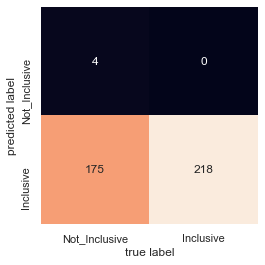

In [31]:
mat = confusion_matrix(y_test_lem, nb_test_preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Not_Inclusive', 'Inclusive'], 
            yticklabels=['Not_Inclusive', 'Inclusive']
           )
plt.xlabel('true label')
plt.ylabel('predicted label');

## Fixing cut-off bug
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

In [ ]:
### Code to look at all metrics together
# nb_train_score = accuracy_score(target, nb_train_preds)
# nb_test_score = accuracy_score(newsgroups_test.target, nb_test_preds)
# rf_train_score = accuracy_score(target, rf_train_preds)
# rf_test_score = accuracy_score(newsgroups_test.target, rf_test_preds)

# print("Multinomial Naive Bayes")
# print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
# print("")
# print('-'*70)
# print("")
# print('Random Forest')
# print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))